# Decision Tree with iris

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns

In [12]:

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state= 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(105, 4) (105,)
(45, 4) (45,)


In [31]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

# 시각화

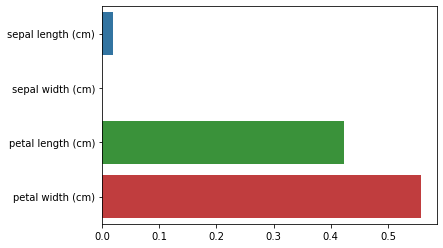

In [26]:
feature_names = load_iris()["feature_names"]
sns.barplot(model.feature_importances_, feature_names)

[Text(558.0, 498.3, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(472.15384615384613, 407.70000000000005, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(643.8461538461538, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(343.38461538461536, 317.1, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(171.69230769230768, 226.5, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(85.84615384615384, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(257.53846153846155, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(429.23076923076917, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(600.9230769230769, 135.89999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(515.0769230769231, 45.29

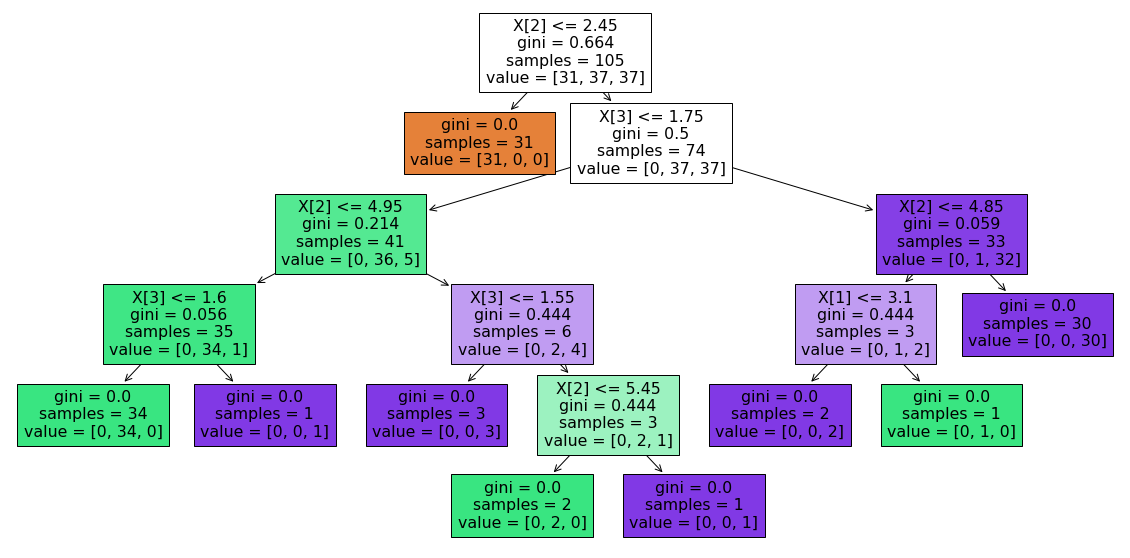

In [33]:
plt.figure(figsize = (20,10))
tree.plot_tree(model, filled = True)

# 당뇨병 예측 모델 만들기
## normalize 기법 사용함

In [34]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [97]:
# 데이터 나누기
# normalzie를 가해서 acc를 높여보자.
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

scaler = StandardScaler()
scaler.fit(X) # mean, std를 계산해줌
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, shuffle = True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(537, 8) (537,)
(231, 8) (231,)


In [98]:
# 학습 및 평가하기 -> 오버피팅이 지금 발생하고 있음.
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.7532467532467533

In [99]:
model.score(X_train, y_train)

1.0

# EDA

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [101]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 결측치 처리하기

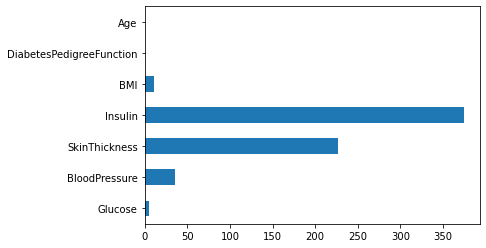

In [110]:
import numpy as np
df_null = df.iloc[:,1:-1].replace(0, np.nan)

df_null.isnull().sum().plot.barh()


In [112]:
df["Outcome"].value_counts(normalize= True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [115]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [505]:
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


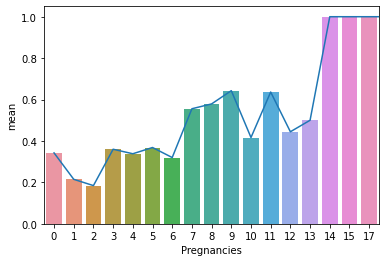

In [118]:
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()

sns.lineplot(x = df_po["Pregnancies"], y = df_po["mean"])
sns.barplot(x = df_po["Pregnancies"], y = df_po["mean"])


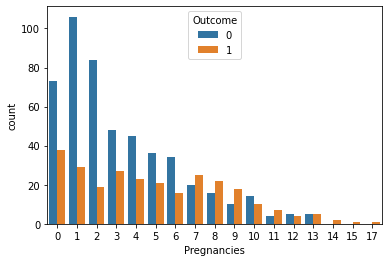

In [120]:
# 임신수에 따른 당뇨
sns.countplot(data = df, x = "Pregnancies", hue = "Outcome")

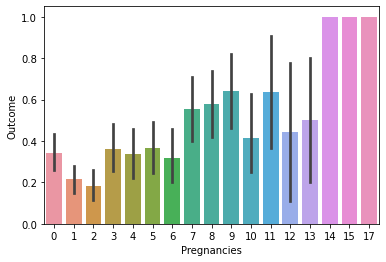

In [122]:
# 임신수에 따른 당뇨
sns.barplot(data = df, x = "Pregnancies", y = "Outcome")

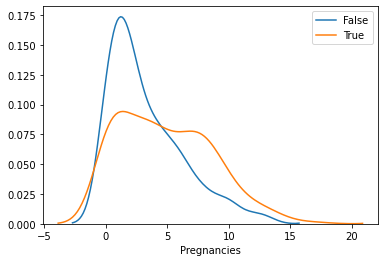

In [128]:
df1 = df[df["Outcome"]  == 0]
df2 = df[df["Outcome"]  == 1]

sns.distplot(df1["Pregnancies"], hist = False, label = "False")
sns.distplot(df2["Pregnancies"], hist = False, label = "True")

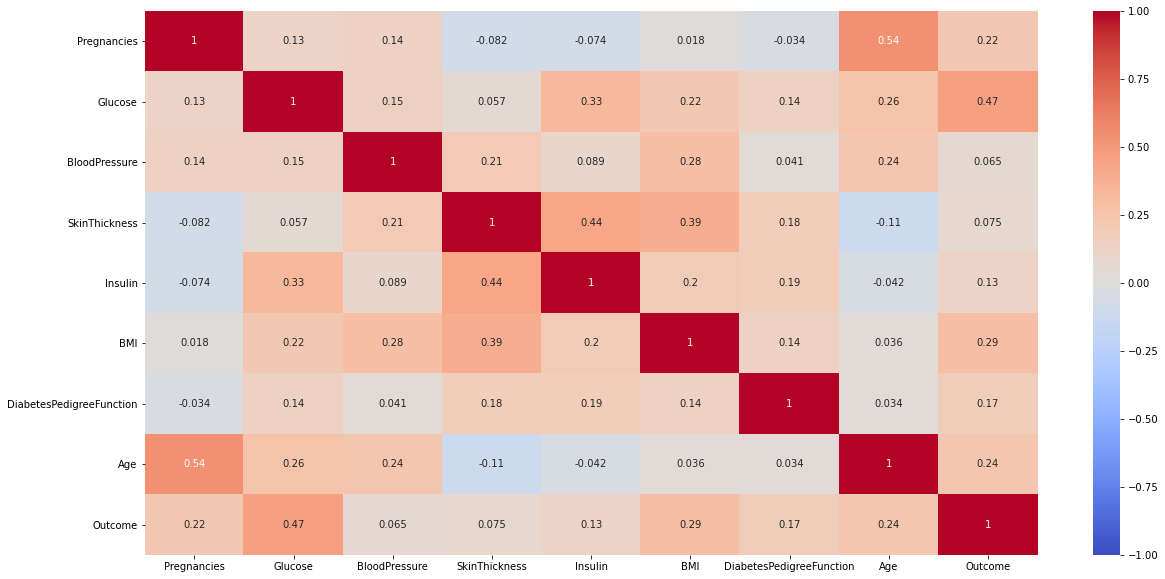

In [134]:

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, vmax = 1, vmin = -1, cmap = "coolwarm")

# 모델성능개선하기
- 연속수치 데이터를 범주형 변수로 바꾸기
Preganancies > 6 이면 높음으로 바꿔버림

In [141]:
df["Pregnancies"] = df["Pregnancies"] > 6


In [145]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], train_size = 0.7, random_state = 42)

# Model
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.7056277056277056

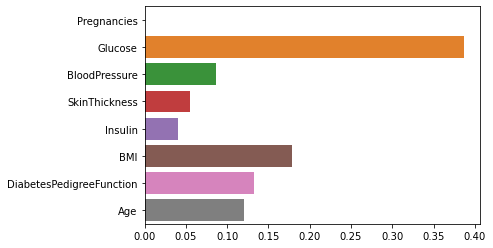

In [148]:
columns = X_train.columns.tolist()
sns.barplot(model.feature_importances_, columns)

# 범주형 데이터 만들기

In [149]:
df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60) # 조건식은 꼭 소괄호!
df["Age_high"] = df["Age"] > 60

In [154]:

feature_names = df.columns.tolist()

feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age')


In [197]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,feature_names], df.loc[:,"Outcome"], train_size = 0.7, random_state = 42)

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7142857142857143

# 결측치를 평균값으로

In [226]:
df = pd.read_csv("diabetes.csv")
df["Insulin_nan"] = df["Insulin"].replace(0,np.nan)

df.groupby("Outcome")[["Insulin", "Insulin_nan"]].agg(["mean","median"])



Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [235]:
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 130.2
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 206.8

df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5




In [236]:
columns = df.columns.tolist()
columns.remove("Pregnancies")
columns.remove("Insulin")
columns.remove("Outcome")

target_name = "Outcome"

In [242]:

X_train, X_test, y_train, y_test = train_test_split(df.loc[:,columns], df.loc[:,target_name], train_size = 0.7, random_state = 42)

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8398268398268398

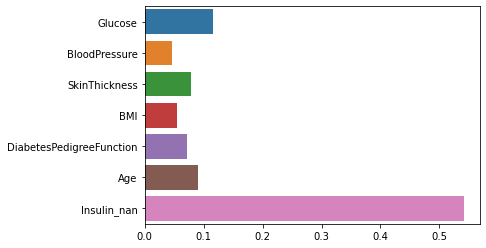

In [243]:
sns.barplot(model.feature_importances_, columns)

# outlier 다루기

IQR에서 벗어난 데이터를 없애고 학습시켰음

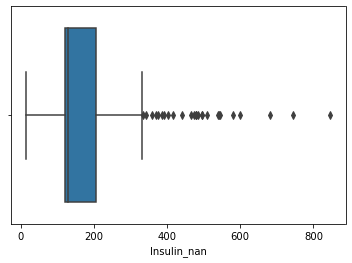

In [244]:
sns.boxplot(df["Insulin_nan"])

In [285]:
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
OUT = IQR3 + 1.5*IQR

columns = df.columns.tolist()
columns.remove("Pregnancies")
columns.remove("Insulin")
columns.remove("Age")

In [286]:
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Insulin_nan']

In [313]:
train, test = train_test_split(df.loc[:,columns],train_size = 0.8, random_state = 42)
train = train[train["Insulin_nan"] < OUT]

X_train, y_train = train.drop("Outcome", axis = 1), train["Outcome"]
X_test, y_test = test.drop("Outcome", axis = 1), test["Outcome"]

# scaling 추가
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# train = pd.DataFrame(train)
# test = pd.DataFrame(test)


for _ in range(10):
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))


0.8441558441558441
0.8441558441558441
0.8571428571428571
0.8441558441558441
0.8181818181818182
0.8441558441558441
0.8506493506493507
0.8506493506493507
0.8506493506493507
0.8441558441558441


# K-fold

In [351]:
from sklearn.model_selection import GridSearchCV
model = tree.DecisionTreeClassifier(random_state= 42)

param_grid = {"max_depth": range(3,20),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}

# 여기서 cv가 5개라는게 5개의 kfold를 사용하겠다는 말이다.
clf = GridSearchCV(model, param_grid = param_grid, cv = 5, n_jobs= -1)
clf.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 20),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]})

In [352]:
clf.best_score_

0.9104543512320182

In [353]:
clf.score(X_test,y_test)

0.8441558441558441

# 여타 다른 모델들

In [364]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 150)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8571428571428571


In [370]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators= 150)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8766233766233766


# 이번엔 결측치를 mean이 아니라 회귀분석 값으로 고려해보자.

In [371]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [373]:
train = df[df["Insulin"] != 0]
test = df[df["Insulin"] == 0]

In [399]:
X_train, y_train = train.drop("Insulin", axis = 1), train["Insulin"]
X_test, y_test = test.drop("Insulin", axis = 1), test["Insulin"]

In [393]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

pred = model.predict(X_test)

In [397]:
df.loc[df["Insulin"] == 0,"Insulin"] = pred

### 회귀분석이 반영된 값을 다시 분석

In [415]:
feature = df.columns.tolist()
feature.remove("Pregnancies")
feature.remove("Outcome")

target = "Outcome"
X_trian, X_test, y_train, y_test = train_test_split(df.loc[:,feature], df[target], shuffle = True, random_state = 42)


In [428]:
X, y = df.drop(["Outcome","Pregnancies"], axis = 1), df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size = 0.8, shuffle = True, random_state = 42)


model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7402597402597403

# Grid search
: 가장 우수한 성능을 보이는 하이퍼 파라미터

In [432]:
modle = DecisionTreeRegressor(random_state =42)
param_grid = {"max_depth": range(3,12),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid= param_grid, n_jobs= -1, verbose= 1, cv = 5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    0.6s finished


0.7402597402597403

In [435]:
pd.DataFrame(clf.cv_results_).sort_values(by = "rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004621,0.000156,0.003014,0.000717,3,0.3,"{'max_depth': 3, 'max_features': 0.3}",0.747967,0.739837,0.764228,0.723577,0.795082,0.754138,0.024309,1
17,0.008894,0.004084,0.002731,0.000142,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.691057,0.813008,0.666667,0.723577,0.827869,0.744436,0.064801,2
9,0.003927,0.000141,0.002483,0.000092,4,1,"{'max_depth': 4, 'max_features': 1}",0.691057,0.764228,0.764228,0.739837,0.762295,0.744329,0.028188,3
6,0.004536,0.000731,0.003799,0.001493,4,0.5,"{'max_depth': 4, 'max_features': 0.5}",0.731707,0.796748,0.707317,0.731707,0.754098,0.744316,0.030105,4
13,0.006050,0.002569,0.003785,0.002118,5,0.9,"{'max_depth': 5, 'max_features': 0.9}",0.682927,0.804878,0.756098,0.731707,0.745902,0.744302,0.039336,5


# RandomSearch_cv

In [441]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(1,20,10)

max_features = np.random.uniform(0.4, 1.0, 100)

In [444]:
param = {"max_depth": max_depth,
         "max_features": max_features,
         "min_samples_split": list(range(2,7))}

clf = RandomizedSearchCV(model,
                         param,
                         n_iter = 200,
                         scoring= "accuracy",
                         n_jobs = -1,
                         cv = 5)

clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([18,  1,  2, 18, 19,  2, 13, 13,  6, 11]),
                                        'max_features': array([0.88113035, 0.79028551, 0.70441723, 0.69343788, 0.6467359 ,
       0.95824111, 0.65699739, 0.64351746, 0.62295953, 0.69867454,
       0.85911801, 0.86345154, 0.42838645, 0.8100727 , 0.97339971,
       0.56367862, 0.8002...
       0.97765   , 0.50367416, 0.53909707, 0.49813707, 0.4083271 ,
       0.63331498, 0.51673455, 0.65230943, 0.83053863, 0.61513685,
       0.4213871 , 0.90355155, 0.84180681, 0.94367139, 0.89328629,
       0.64938485, 0.87082426, 0.89810651, 0.94088167, 0.83646246,
       0.78903176, 0.52317718, 0.44672774, 0.73219146, 0.96896193,
       0.61127154, 0.99561878, 0.54732258, 0.93485741, 0.56210215]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   scoring

In [450]:
print(clf.score(X_test,y_test))
pd.DataFrame(clf.cv_results_).sort_values(by = "rank_test_score").head()

0.7727272727272727


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
131,0.004344,0.000606,0.004308,0.001179,3,0.693438,2,"{'min_samples_split': 3, 'max_features': 0.693...",0.699187,0.813008,0.764228,0.731707,0.778689,0.757364,0.039092,1
188,0.005317,0.001324,0.003321,0.000962,4,0.962415,2,"{'min_samples_split': 4, 'max_features': 0.962...",0.699187,0.813008,0.764228,0.731707,0.778689,0.757364,0.039092,1
77,0.005311,0.001418,0.003689,0.001508,3,0.78309,2,"{'min_samples_split': 3, 'max_features': 0.783...",0.691057,0.813008,0.764228,0.731707,0.778689,0.755738,0.041569,3
190,0.004688,0.001003,0.004028,0.002163,2,0.995619,2,"{'min_samples_split': 2, 'max_features': 0.995...",0.691057,0.813008,0.764228,0.731707,0.778689,0.755738,0.041569,3
144,0.004230,0.000364,0.003227,0.001735,4,0.836462,2,"{'min_samples_split': 4, 'max_features': 0.836...",0.699187,0.813008,0.764228,0.723577,0.770492,0.754098,0.039468,5


# 다양한 모델에 대해 RandomSearchCV

In [455]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

model = [DecisionTreeClassifier(random_state = 42),
         RandomForestClassifier(random_state= 42),
         GradientBoostingClassifier(random_state= 42)]

max_depth = np.random.randint(2,20,10)
max_features = np.random.uniform(0.3, 1.0, 100)

param = {"max_depth": max_depth,
         "max_features": max_features}


results = []
for estimator in model:
    result = []
    #이렇게 하려면 Decision tree가 제일먼저 나와있는게 맞음
    if estimator.__class__.__name__ != "DecisionTreeClassifier":
        param["n_estimators"] = np.random.randint(100,200,10) # 트리의 개수
    

    # 조각을 cv개 만큼 가지고, n_iter만큼 돌린다!
    clf = RandomizedSearchCV(estimator,
                       param,
                       n_iter = 100,
                       scoring = "accuracy",
                       n_jobs = -1,
                       cv = 5,
                       verbose = 2)
    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)
    


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.1min finished


In [479]:
models = pd.DataFrame(results, columns = ["estimator", "best_params_", "train_score_", "test_score", "cv_result"])
models

,estimator,best_params_,train_score_,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.535461359134187, 'max_depth...",0.736146,0.714286,"{'mean_fit_time': [0.004289007186889649, 0.005..."
1,RandomForestClassifier,"{'n_estimators': 192, 'max_features': 0.988059...",0.785073,0.746753,"{'mean_fit_time': [0.6131621837615967, 0.52839..."
2,GradientBoostingClassifier,"{'n_estimators': 170, 'max_features': 0.302136...",0.783433,0.714286,"{'mean_fit_time': [1.6977209568023681, 0.20289..."


# Cross validation으로 학습세트의 오차 측정하기
- classification 문제

In [483]:
from sklearn.model_selection import cross_val_predict
X, y = df.drop("Outcome", axis = 1), df["Outcome"]

model = DecisionTreeClassifier()

pred = cross_val_predict(model, X, y, cv= 5, verbose = 2, n_jobs= -1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


In [488]:
#t = models.loc[1, "best_params_"]

model = RandomForestClassifier(n_estimators= 192, max_features= 0.988, max_depth= 4)
pred = cross_val_predict(model, X, y, cv = 5, verbose = 2, n_jobs = -1)
np.mean(pred == y)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


0.76171875

# Cross validation으로 학습세트의 오차 측정하기
- regression 버전

In [473]:
from sklearn.model_selection import cross_val_predict
X, y = df.drop("Insulin", axis = 1), df["Insulin"]

model = DecisionTreeRegressor()

pred = cross_val_predict(model, X, y, cv= 5, verbose = 2, n_jobs= -1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [477]:
r2_score(pred, y)

0.3151074496627947

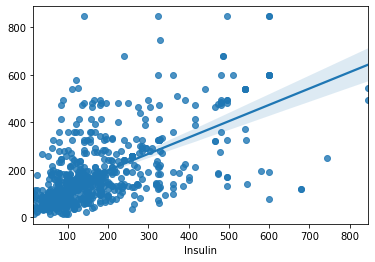

In [475]:
sns.regplot(y, pred)

# RandomSearchCV로 최적의 파라미터를 찾아보자

In [489]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state = 42),
              RandomForestRegressor(random_state = 42),
              GradientBoostingRegressor(random_state = 42)]



In [491]:
X, y = df.drop("Insulin", axis = 1), df["Insulin"]


In [493]:
param = {"max_depth": np.random.randint(10,100,20),
         "max_features" : np.random.uniform(0.3, 1.0, 100)}

results = []
for estimator in estimators:
    result = []
    if not estimator.__class__.__name__ == "DecisionTreeRegressor":
        param["n_estimators"] = np.random.randint(10,100,20)
    regressor = RandomizedSearchCV(
        estimator,
        param,
        n_iter = 10,
        n_jobs= -1,
        cv = 5,
        verbose = 2
    )
    regressor.fit(X,y)
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)
    
    
    

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


In [494]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator","r2_score","cv_result"]
df_cv

,model,params,estimator,r2_score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.8489401262877991, 'max_dept...","DecisionTreeRegressor(max_depth=82, max_featur...",0.209593,"{'mean_fit_time': [0.007787656784057617, 0.008..."
1,RandomForestRegressor,"{'n_estimators': 89, 'max_features': 0.7258953...","(DecisionTreeRegressor(max_depth=47, max_featu...",0.500624,"{'mean_fit_time': [0.23131971359252929, 0.2258..."
2,GradientBoostingRegressor,"{'n_estimators': 30, 'max_features': 0.6824718...",([DecisionTreeRegressor(criterion='friedman_ms...,0.496014,"{'mean_fit_time': [0.18631424903869628, 0.0965..."


In [497]:
best_model = df_cv.loc[1,"estimator"]


In [499]:
from sklearn.model_selection import cross_validate

cross_validate(best_model, X,y, cv = 3)

{'fit_time': array([0.17350912, 0.14797592, 0.14920187]),
 'score_time': array([0.00868177, 0.00869608, 0.00870609]),
 'test_score': array([0.46455761, 0.35648969, 0.47493522])}

In [501]:
pred = cross_val_predict(best_model, X,y, cv = 3)
pred

array([199.7752809 ,  66.23595506, 233.5505618 ,  59.49438202,
       203.80898876, 112.4494382 ,  75.88764045, 135.53932584,
       301.        , 324.48314607, 129.93258427, 263.21348315,
       246.38202247, 327.80898876, 205.07865169,  93.62921348,
       173.61797753, 112.05617978, 103.24719101, 153.7752809 ,
       239.8988764 , 198.20224719, 302.94382022, 109.57303371,
       216.56179775, 176.47191011, 325.69662921,  77.4494382 ,
       258.8988764 , 165.60674157, 175.56179775, 200.86516854,
        57.17977528,  69.66292135, 204.94382022, 125.68539326,
       180.66292135, 162.05617978, 109.16853933, 191.78651685,
       238.11235955, 235.93258427, 106.61797753, 253.08988764,
       228.73033708, 278.2247191 , 188.01123596,  50.43820225,
       118.68539326,  82.04494382, 115.48314607, 144.94382022,
        57.96629213, 273.08988764, 174.42696629,  58.40449438,
       274.06741573, 105.59550562, 229.60674157, 117.2247191 ,
        69.7752809 , 234.31460674,  54.46067416, 215.58

In [504]:
r2_score(y, pred)

0.4396584697345973

# random_search_cv로 최고로 좋은 모델을 찾아주면 될 것 같다.